In [21]:
from fastai import * 
from fastai.data.all import *
from fastai.vision.data import * 
from fastai.vision.core import *
from fastai.vision.all import *
import re
import os
import glob
from skimage import io
import random
import numpy as np
import PIL


## 892104 images
path_img = '/hpc/scratch/hdd2/fs541623/CellProfilerFeatureExtraction/CP_Cropped_Cells'
fnames = get_image_files('/hpc/scratch/hdd2/fs541623/CellProfilerFeatureExtraction/CP_Cropped_Cells')

# Need to specifiy it is grayscale image
data = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                get_items = get_image_files,
                get_y=label_func,
                splitter=RandomSubsetSplitter(train_sz=0.9, valid_sz=0.1, seed=2),
                item_tfms=Resize(224), 
                batch_tfms=[Normalize.from_stats(*imagenet_stats)])
dls = data.dataloaders(path_img, bs=32)
dls = dls.cuda()


KeyError: "Labels 'T', 'i', 'm', 'e', '_', '7', '2', 'h', 'r', 's' were not included in the training dataset"

NameError: name 'sample_ds' is not defined

In [20]:
def label_func(fname):
    time, well = re.match(r'.*(Time_\d+hrs).*(Well_\d+).*', fname.name).groups()
    return time, well

In [12]:
time, well = re.match(r'.*(Time_\d+hrs).*(Well_\d+).*', fnames[0].name).groups()


In [11]:
time, well

('Time_72hrs', 'Well_17')

In [6]:
fnames[0].name

'Time_72hrs_R3_Well_17_Field_8_CytObj447.tif'

In [ ]:
learn50 = cnn_learner(dls, models.resnet50, metrics=partial(accuracy_multi, thresh=0.5))

In [ ]:
learn50.fit_one_cycle(5, lr_max=slice(0.01))

learn50.unfreeze()
learn50.fit_one_cycle(10, lr_max=slice(1e-6, 1.7e-4))

In [5]:
learn50.load('/hpc/scratch/hdd2/fs541623/Bash_scripts/models/stage-2-full-multi_class')

In [9]:
interp = ClassificationInterpretation.from_learner(learn50)

,target,predicted,probabilities,loss
0,1;6;T;_;e;h;i;m;r;s,2;4;6;7;T;_;h;m,"tensor([1.5929e-02, 1.0000e+00, 9.9991e-01, 6.9441e-01, 1.0000e+00, 8.6117e-02,\n 9.9453e-01, 9.9986e-01, 2.5158e-04, 9.9977e-01, 7.2872e-03, 9.9936e-01,\n 4.6092e-01, 4.6537e-01])",3.9390146732330322
1,1;6;T;_;e;h;i;m;r;s,2;4;7;T;_;h;m;r;s,"tensor([4.8434e-03, 9.9995e-01, 9.9974e-01, 3.2087e-01, 1.0000e+00, 9.2956e-02,\n 9.9226e-01, 9.9847e-01, 2.9899e-04, 9.9963e-01, 3.7209e-04, 9.9766e-01,\n 5.7610e-01, 8.6504e-01])",3.938737154006958
2,8;T;_;e;h;i;m;r;s,2;4;6;7;T;_;h;m;r;s,"tensor([1.6137e-02, 9.9998e-01, 9.9979e-01, 6.1096e-01, 9.9999e-01, 1.1284e-02,\n 9.7372e-01, 9.9976e-01, 8.2827e-05, 9.9980e-01, 3.3915e-04, 9.9963e-01,\n 5.0029e-01, 6.3384e-01])",3.9087486267089844
3,8;T;_;e;h;i;m;r;s,2;4;7;T;_;h;m;r;s,"tensor([3.3002e-02, 9.9985e-01, 9.9997e-01, 3.1472e-01, 1.0000e+00, 2.6148e-02,\n 9.7336e-01, 9.9749e-01, 1.3872e-03, 9.9963e-01, 3.0075e-04, 9.9682e-01,\n 6.6720e-01, 8.1768e-01])",3.696767807006836
4,8;T;_;e;h;i;m;r;s,2;4;6;7;T;_;h;m;r;s,"tensor([3.9226e-02, 9.9993e-01, 9.9997e-01, 6.1618e-01, 1.0000e+00, 3.7248e-02,\n 9.9251e-01, 9.9970e-01, 1.2569e-03, 9.9943e-01, 6.6526e-04, 9.9644e-01,\n 5.4839e-01, 8.2378e-01])",3.6873385906219482
5,8;T;_;e;h;i;m;r;s,2;4;6;7;T;_;h;m;r;s,"tensor([1.3951e-02, 9.9993e-01, 9.9995e-01, 5.9177e-01, 1.0000e+00, 2.7978e-02,\n 9.7102e-01, 9.9903e-01, 1.4196e-03, 9.9956e-01, 9.1769e-04, 9.9748e-01,\n 5.2789e-01, 8.1203e-01])",3.670215606689453
6,8;T;_;e;h;i;m;r;s,2;4;7;T;_;h;m;r;s,"tensor([1.0053e-01, 9.9997e-01, 9.9992e-01, 1.6035e-01, 1.0000e+00, 4.2344e-02,\n 9.8227e-01, 9.9985e-01, 3.4569e-04, 9.9952e-01, 7.7729e-04, 9.9930e-01,\n 7.2628e-01, 8.6187e-01])",3.663982629776001
7,1;6;T;_;e;h;i;m;r;s,2;4;7;T;_;h;m;r;s,"tensor([7.6168e-02, 9.9998e-01, 9.9978e-01, 1.5412e-01, 9.9999e-01, 4.4896e-02,\n 9.6425e-01, 9.9977e-01, 4.1899e-04, 9.9979e-01, 5.3975e-04, 9.9970e-01,\n 7.8981e-01, 8.8863e-01])",3.6631250381469727
8,8;T;_;e;h;i;m;r;s,2;4;7;T;_;h;m;r;s,"tensor([6.5468e-02, 9.9997e-01, 9.9985e-01, 1.5897e-01, 1.0000e+00, 2.2537e-02,\n 9.7576e-01, 9.9973e-01, 7.1190e-04, 9.9930e-01, 7.6903e-04, 9.9921e-01,\n 5.7383e-01, 9.1017e-01])",3.662945508956909


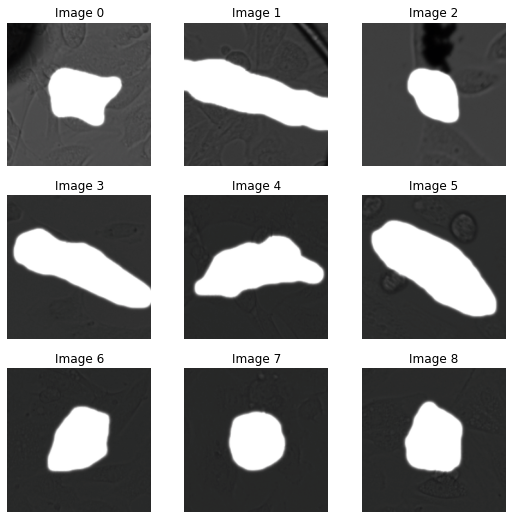

In [13]:
interp.plot_top_losses(9)

In [ ]:
## do Heatmap 